In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [20]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [21]:
df=pd.DataFrame()

In [22]:
df['X']=X.reshape(100)
df['y']=y

In [23]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs y')

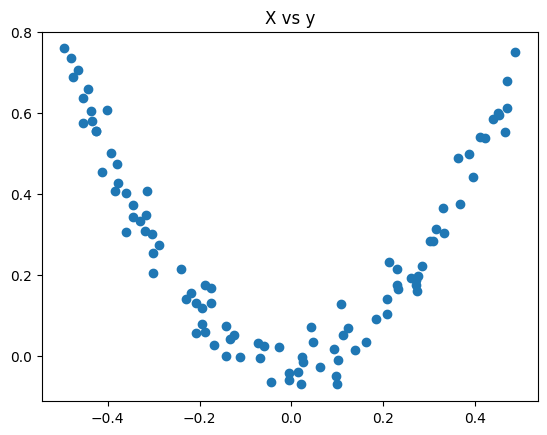

In [24]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [25]:
df['Pred1']=df['y'].mean()

In [26]:
df

,X,y,Pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [27]:
df['Residual_error']=df['y']-df['Pred1']

In [28]:
df

,X,y,Pred1,Residual_error
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


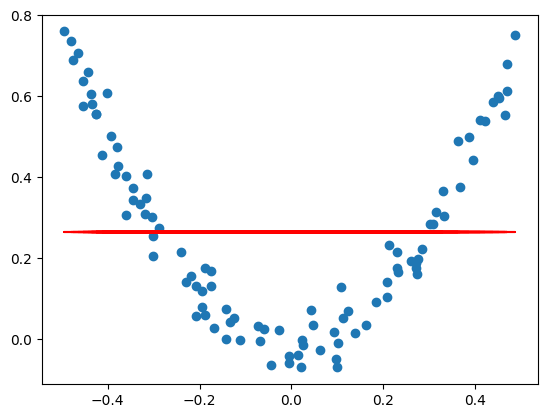

In [40]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['Pred1'],color='r')

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [32]:
tree1.fit(df['X'].values.reshape(100,1),df['Residual_error'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453

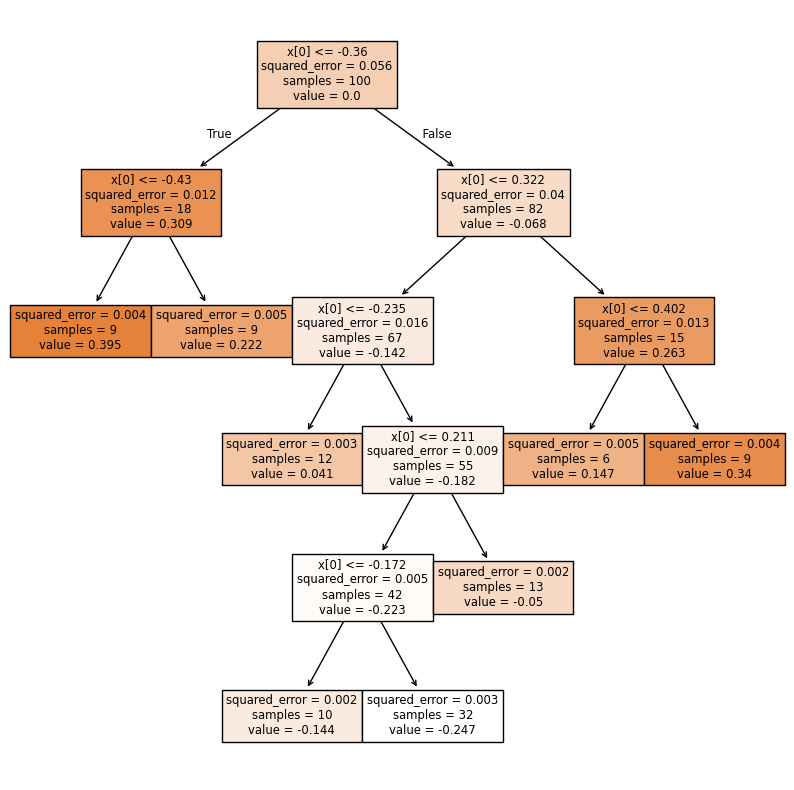

In [38]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(tree1,filled=True)

In [41]:
#generating X_test
X_test=np.linspace(-.5,.5,500)

In [42]:
y_pred=0.265458+tree1.predict(X_test.reshape(500,1))

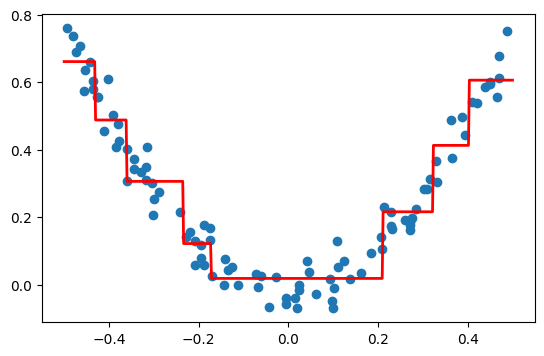

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='r')
plt.scatter(df['X'],df['y'])
plt.show()